# "Regression Benchmark" 🌭🍟🍕

### Importing Libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.getcwd()
os.chdir("F:\Read_data")

In [2]:
data = pd.read_csv("train_bm.csv")    

In [3]:
data.shape           # data.shape[0] => no of rows  1 => no of columns 2=> out of range

(8523, 12)

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.isnull().sum()    # values missing in Item_Weight and Outlet_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Shuffling and creating tain and test data👀

In [7]:
from sklearn.utils import shuffle           #3 parts for train 1 for test 

#Shuffling the dataset
data = shuffle(data, random_state =42)

#creating 4 divisions
div =int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div +1,:]       #step value = 3*div +1 
test = data.loc[3*div+1:]

In [8]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7503,FDI28,14.300,Low Fat,0.026300,Frozen Foods,79.4302,OUT013,1987,High,Tier 3,Supermarket Type1,1743.0644
2957,NCM17,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1,356.8688
7031,FDC14,14.500,Regular,0.041313,Canned,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1,377.5086
1084,DRC36,NaN,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3,5778.4782
856,FDS27,10.195,Regular,0.012456,Meat,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1,2356.9320


In [9]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6391,DRM23,16.60,Low Fat,0.135944,Hard Drinks,172.0422,OUT049,1999,Medium,Tier 1,Supermarket Type1,2586.6330
2895,FDM27,NaN,Regular,0.277459,Meat,156.3946,OUT019,1985,Small,Tier 1,Grocery Store,473.3838
6814,FDJ57,NaN,Regular,0.000000,Seafood,184.3582,OUT019,1985,Small,Tier 1,Grocery Store,185.7582
7537,FDV08,7.35,Low Fat,0.028571,Fruits and Vegetables,40.8454,OUT013,1987,High,Tier 3,Supermarket Type1,587.2356
3425,NCA17,20.60,Low Fat,0.000000,Health and Hygiene,148.8392,OUT046,1997,Small,Tier 1,Supermarket Type1,2684.5056


## Simple Mean( mean of item Outlet_sales)

In [10]:
#storng simple mean in a new column of test as 'simple_mean'
test['simple_mean'] = train['Item_Outlet_Sales'].mean()

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#calculating mean absoute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['Item_Outlet_Sales'],test['simple_mean'])
simple_mean_error

1355.4481105570344

## Mean Absolute Error 

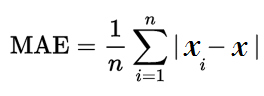

Where:

1. n = the number of errors,
2. Σ = summation symbol (which means “add them all up”),
3. |xi – x| = the absolute errors.    xi = experimental  x=True

__The formula may look a little daunting, but the steps are easy:

1. Find all of your absolute errors, xi – x.
2. Add them all up.
3. Divide by the number of errors. For example, if you had 10 measurements, divide by 10.

## Mean Item Outlet sales w.r.t  Outlet_type 

In [12]:
out_type = train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type',aggfunc= np.mean)
out_type                # or pd.pivot_table(train,values='Item_Outlet_Sales',index='Outlet_Type',aggfunc= np.mean)

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,332.606025
Supermarket Type1,2245.228499
Supermarket Type2,1938.684847
Supermarket Type3,3776.185098


In [13]:
#initializing new column to zero
test["Out_type_mean"] =  0  
for i in train["Outlet_Type"].unique():
    test["Out_type_mean"][test["Outlet_Type"] == str(i)] = train["Item_Outlet_Sales"][train["Outlet_Type"] == str(i)].mean()

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Robin\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [14]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,simple_mean,Out_type_mean
6391,DRM23,16.60,Low Fat,0.135944,Hard Drinks,172.0422,OUT049,1999,Medium,Tier 1,Supermarket Type1,2586.6330,2138.713586,2245.228499
2895,FDM27,NaN,Regular,0.277459,Meat,156.3946,OUT019,1985,Small,Tier 1,Grocery Store,473.3838,2138.713586,332.606025
6814,FDJ57,NaN,Regular,0.000000,Seafood,184.3582,OUT019,1985,Small,Tier 1,Grocery Store,185.7582,2138.713586,332.606025
7537,FDV08,7.35,Low Fat,0.028571,Fruits and Vegetables,40.8454,OUT013,1987,High,Tier 3,Supermarket Type1,587.2356,2138.713586,2245.228499
3425,NCA17,20.60,Low Fat,0.000000,Health and Hygiene,148.8392,OUT046,1997,Small,Tier 1,Supermarket Type1,2684.5056,2138.713586,2245.228499


In [15]:
# simple_mean has the same value for all , Out_type_mean has mean category wise is category wise

In [44]:
# test.drop(columns='out_type_mean',inplace= True)  #as did it two tymes once with small o once with caplital O
#not required anymore

In [45]:
out_type_error = MAE(test['Item_Outlet_Sales'],test['Out_type_mean'])    # variable name........column name
out_type_error

1138.8026221064356

## Mean Item Outlet Sales w.r.t Outlet_Establishment_Year

In [46]:
out_year = train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Establishment_Year',aggfunc= np.mean)
out_year

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2547.909733
1987,2160.883029
1997,2200.803276
1998,320.792473
1999,2245.345807
2002,2136.727766
2004,2415.594646
2007,2320.598343
2009,1938.684847


In [47]:
#initializing new column to zero
test["Out_year_mean"] =  0  
for i in train["Outlet_Establishment_Year"].unique():
    test["Out_year_mean"][test["Outlet_Establishment_Year"] == str(i)] = train["Item_Outlet_Sales"][train["Outlet_Establishment_Year"] == str(i)].mean()

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Robin\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Robin\Anaconda3\lib\site-packages\pandas\core\generic.py:87

In [48]:
out_year_error = MAE(test['Item_Outlet_Sales'],test['Out_year_mean'])    # variable name........column name
out_year_error

2228.0685878504673

## Mean Item_Outlet_Sales w.r.t  location

In [21]:
out_loc = train.pivot_table(values="Item_Outlet_Sales", index="Outlet_Location_Type", aggfunc= np.mean)
out_loc

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1804.051997
Tier 2,2288.475485
Tier 3,2255.793325


In [25]:
#Initialising empty cells           #Assigned to "Out_Loc_Mean" 
test["Out_loc_mean"]= 0
for i in train["Outlet_Location_Type"].unique():
    test["Out_loc_mean"][test["Outlet_Location_Type"]==str(i)] = train["Item_Outlet_Sales"][train["Outlet_Location_Type"]==str(i)].mean()

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Robin\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [26]:
out_loc_error = MAE(test["Item_Outlet_Sales"] , test["Out_loc_mean"])
out_loc_error

1348.8509267072284

In [30]:
test["Out_loc_mean"].head(10)

6391    1804.051997
2895    1804.051997
6814    1804.051997
7537    2255.793325
3425    1804.051997
5027    2255.793325
5062    2288.475485
7900    2255.793325
4482    1804.051997
5254    2255.793325
Name: Out_loc_mean, dtype: float64

## Mean Item_Outlet_Sales w.r.t  both Outlet_Location_Type and Outlet_Establishment _Year

In [40]:
combo1 = train.pivot_table(values="Item_Outlet_Sales", index=["Outlet_Location_Type" ,"Outlet_Establishment_Year"],aggfunc =np.mean)
combo1

Item_Outlet_Sales
Outlet_Location_Type Outlet_Establishment_Year                   
Tier 1               1985                              344.882031
                     1997                             2200.803276
                     1999                             2245.345807
Tier 2               2002                             2136.727766
                     2004                             2415.594646
                     2007                             2320.598343
Tier 3               1985                             3776.185098
                     1987                             2160.883029
                     1998                              320.792473
                     2009                             1938.684847

In [55]:
#Initialising new empty column
test["super_mean"] = 0

s1 = "Outlet_Establishment_Year"
s2 = "Outlet_Location_Type"

for i in test[s1].unique():
    for j in test[s2].unique():
        test["super_mean"][(test[s1] == i) & (test[s2] == j)] = train["Item_Outlet_Sales"][(train[s1] == i) & (train[s2] == j)].mean()

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Robin\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._up

In [57]:
super_error = MAE(test["Item_Outlet_Sales"],test["super_mean"])
super_error

1140.0522313200124

### Lowest_Error